<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h2>A1: Linear Modeling Case Study</h2>
<h4>DAT-5390 | Computational Data Analytics with Python</h4>
Martha Stephany Del Rio Esparza - Hult<br><br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br>

Side note: Thanks for the template Prof. Chase!
<br><br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part I: Imports and Data Check</h2>

In [53]:
## importing libraries ##
import numpy                   as np  # mathematical essentials
import pandas                  as pd  # data science essentials
import matplotlib.pyplot       as plt # eda 1
import seaborn                 as sns # eda 2
from sklearn.linear_model    import LinearRegression, Lasso, Ridge, SGDRegressor # linear 
from sklearn.neighbors       import KNeighborsRegressor                          # KNN
from sklearn.preprocessing   import StandardScaler                               # standard scaler
from sklearn.tree            import DecisionTreeRegressor, plot_tree             # Decision Tree and plotting
from sklearn.model_selection import RandomizedSearchCV                           # hyperparameter tuning
from sklearn.model_selection import train_test_split                             # train/test split

# checking data file for further inspection
file = '/Users/rafaeldelrio/Desktop/a1_kaggle/datasets/chicago_training_data.xlsx'
df = pd.read_excel(io = file, header = 0)

# setting pandas print options (optional)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# printing head of file to view components
df.head(5)

,ID,DateHour,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),Holiday,FunctioningDay,RENTALS
0,mb_1039,2023-10-14 05:59:54.810,52,81,0.4,2.9,46.4,0.0,0.0,0.00,No,Yes,519
1,mb_1330,2023-10-26 08:59:53.355,51,53,2.2,NaN,35.2,0.0,0.0,1.01,No,Yes,1251
2,mb_551,2023-09-23 21:59:57.250,56,49,2.5,3.4,38.8,0.0,0.0,0.00,No,Yes,1685
3,mb_2103,2023-12-19 14:00:00.000,69,32,9.8,12.4,38.7,0.0,0.0,2.36,No,No,0
4,mb_1430,2023-10-30 12:59:52.855,53,20,2.9,10.8,12.9,0.0,0.0,1.96,No,Yes,814


<br>

In [54]:
## importing data ##

# reading modeling data into Python
modeling_data = './datasets/train.xlsx'

# calling this df_train
df_train = pd.read_excel(io         = modeling_data,
                         sheet_name = 'data',
                         header     = 0,
                         index_col  = 'ID')



# reading testing data into Python
testing_data = './datasets/test.xlsx'

# calling this df_test
df_test = pd.read_excel(io         = testing_data,
                        sheet_name = 'data',
                        header     = 0,
                        index_col  = 'ID')

<br>

In [55]:
# concatenating datasets together for mv analysis and feature engineering
df_train['set'] = 'Not Kaggle'
df_test ['set'] = 'Kaggle'

# concatenating both datasets together for mv and feature engineering
df_full = pd.concat(objs = [df_train, df_test],
                    axis = 0,
                    ignore_index = False)


# checking data
df_full.head(n = 5)

,DateHour,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),Holiday,FunctioningDay,RENTALS,set
ID,,,,,,,,,,,,,
mb_1039,2023-10-14 05:59:54.810000,52,81,0.4,2.9,46.4,0.0,0.0,0.00,No,Yes,519.0,Not Kaggle
mb_1330,2023-10-26 08:59:53.355000,51,53,2.2,NaN,35.2,0.0,0.0,1.01,No,Yes,1251.0,Not Kaggle
mb_551,2023-09-23 21:59:57.250000,56,49,2.5,3.4,38.8,0.0,0.0,0.00,No,Yes,1685.0,Not Kaggle
mb_2103,2023-12-19 14:00:00,69,32,9.8,12.4,38.7,0.0,0.0,2.36,No,No,0.0,Not Kaggle
mb_1430,2023-10-30 12:59:52.855000,53,20,2.9,10.8,12.9,0.0,0.0,1.96,No,Yes,814.0,Not Kaggle


<br>

In [4]:
# checking available features
df_full.columns

Index(['DateHour', 'Temperature(F)', 'Humidity(%)', 'Wind speed (mph)', 'Visibility(miles)', 'DewPointTemperature(F)', 'Rainfall(in)', 'Snowfall(in)', 'SolarRadiation(MJ/m2)', 'Holiday', 'FunctioningDay', 'RENTALS', 'set'], dtype='object')

<br>

In [56]:
#!##############################!#
#!# set your response variable #!#
#!##############################!#
# RENTALS is the prediction I'm trying to make
y_variable = 'RENTALS' # this should be a string

### ANALYSIS INTRODUCTION

With the objective of developing a machine learning model to predict the number of bike rentals in Chicago, my analysis starts with trying to find the variables with the strongest correlation. After I'll be handling the missing values in the dataset, if any, and transforming the variable data types if needed. Once done, I'll proceed to engineer some features that add insightful information for my predictive model and that might make predictions more accurate. Finally, the actual model will be constructed and evaluated, all with pertinent analysis. In the end, the 6 permitted models will be explored and with the top three, hyperparameter tuning will be implemented, ending up with one best than the others, hopefully.

<br><hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part II: Data Preparation</h2><br>
<br><br>
<h3>Base Modeling</h3>

In [6]:
## Base Modeling ##

# Exploratory Data Analysis and Data Preprocessing

# Identifying and developing a correlation matrix for df_train with only numeric columns
numeric_cols = df_train.select_dtypes(include = ['number']).columns
data_corr_numeric = df_train[numeric_cols].corr(method = 'pearson')

# Filtering results to show correlations with RENTALS
rentals_corr_numeric = data_corr_numeric.loc[:, 'RENTALS'].round(decimals = 2).sort_values(ascending = False)

rentals_corr_numeric

RENTALS                   1.00
Temperature(F)            0.32
SolarRadiation(MJ/m2)     0.21
Wind speed (mph)          0.19
DewPointTemperature(F)    0.03
Visibility(miles)         0.00
Snowfall(in)             -0.09
Rainfall(in)             -0.15
Humidity(%)              -0.40
Name: RENTALS, dtype: float64

Before, the correlations of all numeric variables regarding RENTALS were displayed. Most variables present a weak positive relationship. The following heat map is shown to illustrate how strong correlations are just between variables. Although most of them show little correlation, I can clearly identify some that might be useful for feature engineering. For example, dew point has the limit that its temperature is never greater than the air's temperature, making it dependable on it. (Donegan, 2022) Other variables, like rainfall or snowfall seem to have a small correlation with others.

Donegan, B. (2022). Dew point vs. humidity: Which one is a better measure of how muggy the air feels?. FOX Weather. Retrieved from: https://www.foxweather.com/learn/dew-point-best-way-classify-how-much-humidity-in-air

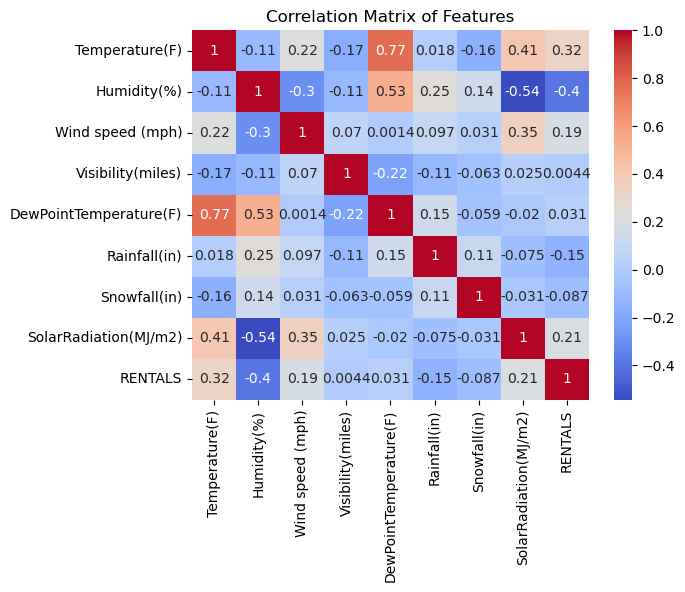

In [7]:
# Heat map shown with sns
sns.heatmap(data_corr_numeric, 
            cmap      = 'coolwarm', 
            annot     = True,  
            linecolor = 'black')
plt.title('Correlation Matrix of Features')
plt.show()

<br><h3>Missing Value Analysis and Imputation</h3>

For this analysis, I decided to look for at each of the columns that seem to have null values. Excluding the rentals column because for right now, the dataset contains both training and testing data. This is to ensure all missing values are handled correctly and future feature engineering is applied to every data point available. To proceed, in the next cell shows the different descriptive measurements of the data. I wasn't satisfied with this so some visuals were built for "Visibility(miles)", "DewPointTemperature(F)" and "SolarRadiation(MJ/m2)".

In [8]:
## Missing Value Analysis 1 ##

# Showing the missing values in the full database
print(df_full.isnull().sum(axis = 0))

DateHour                    0
Temperature(F)              0
Humidity(%)                 0
Wind speed (mph)            0
Visibility(miles)          76
DewPointTemperature(F)     67
Rainfall(in)                0
Snowfall(in)                0
SolarRadiation(MJ/m2)     106
Holiday                     0
FunctioningDay              0
RENTALS                   546
set                         0
dtype: int64


In [9]:
## Missing Value Analysis 2 ##

# Describing the columns to decide how to replace NAs
df_full.describe().round(2)

,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),RENTALS
count,2184.00,2184.00,2184.00,2108.00,2117.00,2184.00,2184.00,2078.00,1638.00
mean,57.39,59.23,3.34,9.65,42.04,0.00,0.00,0.55,828.15
std,12.86,18.69,2.07,3.49,14.00,0.04,0.02,0.81,657.60
min,26.00,13.00,0.00,0.00,-2.20,0.00,0.00,0.00,0.00
25%,48.00,44.00,1.80,7.40,33.40,0.00,0.00,0.00,241.50
50%,57.00,59.00,2.90,11.70,41.90,0.00,0.00,0.00,761.50
75%,68.00,74.00,4.50,12.40,51.60,0.00,0.00,0.98,1203.75
max,91.00,97.00,12.80,12.40,75.00,0.71,0.30,3.18,3303.00


**Visibility(miles) Histogram**
: In the case of visibility, it is greatly affected by the mode. This makes the graph notably skewed and the mean and median wouldn't be the best option to go with. Which is why the mode will be considered for the imputation of missing values in this column.

**SolarRadiation(MJ/m2) Histogram**
: Interestingly enough, something similar happens with the solar radiation graph, but this one is skewed to the opposite side. So in an alike manner, the mode will be used to input the missing values in this column.

**DewPointTemperature(F)**
: Because the mean and median are so similar in this case, either one can be inputted. I decided to use the median for the imputation of missing values in this column. This is because I would like to avoid as many outliers as possible.

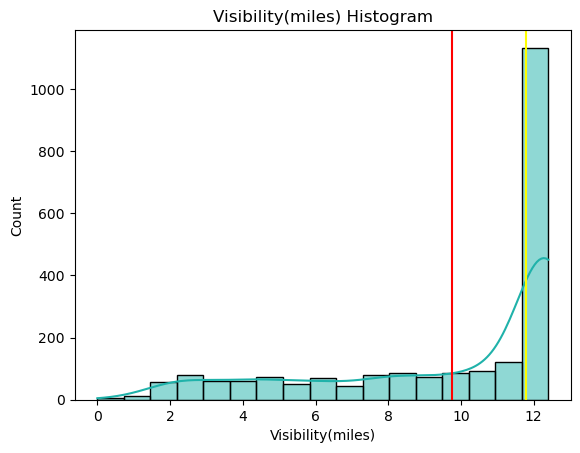

In [14]:
# Plotting 'Visibility(miles)'
sns.histplot(x     = df_full['Visibility(miles)'],
             data  = df_full,
             color = 'lightseagreen',
             kde   = True)

# Title and labels
plt.title (label  = 'Visibility(miles) Histogram')
plt.xlabel(xlabel = 'Visibility(miles)')
plt.ylabel(ylabel = 'Count')

# Showing mean and median lines using axvline
plt.axvline(df_full['Visibility(miles)'].mean(), color = "red" )
plt.axvline(df_full['Visibility(miles)'].median(), color = "yellow") 

# Displaying the plot
plt.show()

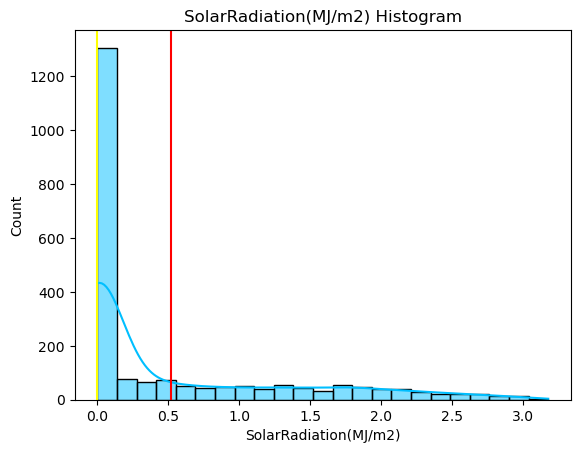

In [15]:
# Plotting 'SolarRadiation(MJ/m2)'
sns.histplot(x    = df_full['SolarRadiation(MJ/m2)'],
             data  = df_full,
             color = 'deepskyblue',
             kde   = True)

# Title and labels
plt.title (label  = 'SolarRadiation(MJ/m2) Histogram')
plt.xlabel(xlabel = 'SolarRadiation(MJ/m2)')
plt.ylabel(ylabel = 'Count')

# Showing mean and median lines using axvline
plt.axvline(df_full['SolarRadiation(MJ/m2)'].mean(), color = "red" )
plt.axvline(df_full['SolarRadiation(MJ/m2)'].median(), color = "yellow") 

# Displaying the plot
plt.show()

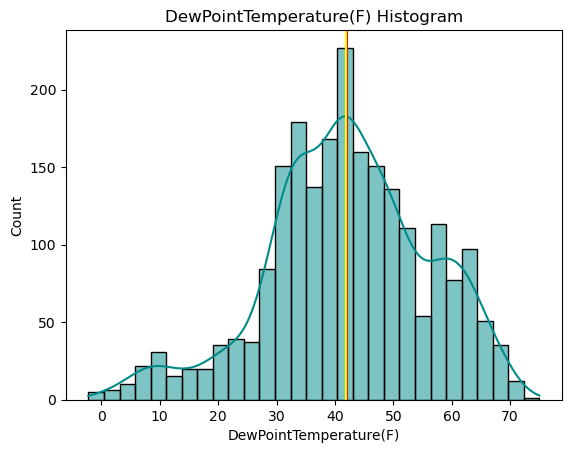

In [16]:
# Plotting 'DewPointTemperature(F)'
sns.histplot(x     = df_full['DewPointTemperature(F)'],
             data  = df_full,
             color = 'darkcyan',
             kde   = True)

# Title and labels
plt.title (label  = 'DewPointTemperature(F) Histogram')
plt.xlabel(xlabel = 'DewPointTemperature(F)')
plt.ylabel(ylabel = 'Count')

# Showing mean and median lines using axvline
plt.axvline(df_full['DewPointTemperature(F)'].mean(), color = "red" )
plt.axvline(df_full['DewPointTemperature(F)'].median(), color = "yellow") 

# Displaying the plot
plt.show()

In [57]:
## Missing Value Imputation ##

# Replacing values with the mode and median 
#of the columns, respectively
# Note: the rentals column will have missing
#values because of the attached testing dataset
df_full['Visibility(miles)'].fillna(value   = float(df_full['Visibility(miles)'].mode()), 
                                    inplace = True)

df_full['SolarRadiation(MJ/m2)'].fillna(value   = float(df_full['SolarRadiation(MJ/m2)'].mode()), 
                                        inplace = True)

df_full['DewPointTemperature(F)'].fillna(value   = float(df_full['DewPointTemperature(F)'].median()), 
                                         inplace = True)

# Ensuring data inputation was completed and
#no values are missing 
print(df_full.isnull().sum(axis = 0))

DateHour                    0
Temperature(F)              0
Humidity(%)                 0
Wind speed (mph)            0
Visibility(miles)           0
DewPointTemperature(F)      0
Rainfall(in)                0
Snowfall(in)                0
SolarRadiation(MJ/m2)       0
Holiday                     0
FunctioningDay              0
RENTALS                   546
set                         0
dtype: int64


/var/folders/_p/6trn_z3x7xx5tyxss9_58jk80000gn/T/ipykernel_95240/3135884003.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  df_full['Visibility(miles)'].fillna(value   = float(df_full['Visibility(miles)'].mode()),
/var/folders/_p/6trn_z3x7xx5tyxss9_58jk80000gn/T/ipykernel_95240/3135884003.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  df_full['SolarRadiation(MJ/m2)'].fillna(value   = float(df_full['SolarRadiation(MJ/m2)'].mode()),


<br><h3>Transformations</h3>

When creating new features and then trying to model, I've come to the conclusion that it's better to deal with the least amount of categorical variables as possible. This being said, for this dataset, there are a couple of categorical variables that could be turned into factors. Meaning that "yes" can be 1 and "no" can be 2, as well as other scales. Taking this into account, I decided to transform both the holiday and functioning day columns following this same logic. In the case for the set column, it will later be eliminated because it's only purpose is to indicate which rows belong to the training dataset and which to testing dataset. The int variables can stay as such because they are already in a numerical type. The datehour column will be engineered in the upcoming cell as a new feature.

In [18]:
## Transformations Analysis ##

# Looking at the data types for each columns
#to identify the object data types
df_full.dtypes

DateHour                   object
Temperature(F)              int64
Humidity(%)                 int64
Wind speed (mph)          float64
Visibility(miles)         float64
DewPointTemperature(F)    float64
Rainfall(in)              float64
Snowfall(in)              float64
SolarRadiation(MJ/m2)     float64
Holiday                    object
FunctioningDay             object
RENTALS                   float64
set                        object
dtype: object

In [58]:
## Transformations ##

# Convert object types into int types for 
#factorization
df_full['Holiday']        = df_full['Holiday'].replace({'Yes' : 1, 'No' : 0})
df_full['FunctioningDay'] = df_full['FunctioningDay'].replace({'Yes' : 1, 'No' : 0})

print(df_full.dtypes)

DateHour                   object
Temperature(F)              int64
Humidity(%)                 int64
Wind speed (mph)          float64
Visibility(miles)         float64
DewPointTemperature(F)    float64
Rainfall(in)              float64
Snowfall(in)              float64
SolarRadiation(MJ/m2)     float64
Holiday                     int64
FunctioningDay              int64
RENTALS                   float64
set                        object
dtype: object


<br><h3>Feature Engineering</h3>

These features were engineered considering not only the correlations that they have with each other, but also the different insights that might be useful for the base modeling or the accuracy of predictions. Each feature will be explained in the next code cell as a comment.

In [59]:
## Feature Engineering ##


###########################################
# FEATURE 1: DATETIME AND HOUR CONVERSION #
###########################################

# Converting to datetime from object (using format = 'mixed' because an error 
#suggested it) using pandas. The column contained differently formatted inputs
#so the format was delimitted to 'mixed'
df_full['DateHour'] = pd.to_datetime(df_full['DateHour'], format = 'mixed')

# Using column data for inputing hour, dayofweek and month, according to pandas
#library, and the new features were added as columns to the dataset
df_full['hour']      = df_full['DateHour'].dt.hour
df_full['dayofweek'] = df_full['DateHour'].dt.dayofweek
df_full['month']     = df_full['DateHour'].dt.month


# Because the datetime seem to have small significance on the dataset, I decided
#on dividing the weekends from the weekdays for further analysis.
def is_weekend(dayofweek) :
    if dayofweek in [5, 6] : # Day "5" is Saturday and "6" Sunday
        return 1
    else:
        return 0

    # The new feature 'is_weekend' was added as a column to the dataset
df_full['is_weekend'] = df_full['dayofweek'].apply(is_weekend)

# For further refinement, I defined a function to divide the time of day into 
#time slots, considering:
    #1 = early morning   (5 - 8)
    #2 = late morning    (8 - 12)
    #3 = early afternoon (12 - 15)
    #4 = late afternoon  (15 - 18)
    #5 = evening         (18 - 22)
    #6 = night           (22 - 5)
def time_slot(hour) :
    if 5 <= hour < 8 :
        return 1
    elif 8 <= hour < 12 :
        return 2
    elif 12 <= hour < 15 :
        return 3
    elif 15 <= hour < 18 :
        return 4
    elif 18 <= hour < 22 :
        return 5
    else:
        return 6

# The new feature 'part_of_day' was added as a column to the dataset
df_full['part_of_day'] = df_full['hour'].apply(time_slot)


#######################################
# FEATURE 2: COMFORT INDEX FOR RIDING #
#######################################

# Keeping in mind the correlation earlier explored with these two variables, I
#came up with this comfort index that uses the different betwwen the dew point's
#and air's temperatures (a higher different suggests dryer and better conditions) 
# and adjusts it to certain factors (wind speed, solar radiation and humidity)
df_full['comfort_index'] = df_full['Temperature(F)'] - df_full['DewPointTemperature(F)']

# Adjusting index based on wind speed 
df_full['comfort_index'] = np.where(df_full['Wind speed (mph)'] > 10, 
                               df_full['comfort_index'] - df_full['Wind speed (mph)'] * 0.1, 
                               df_full['comfort_index'])

# Adjusting index based on solar radiation 
df_full['comfort_index'] = np.where(df_full['SolarRadiation(MJ/m2)'] > 3, 
                               df_full['comfort_index'] - df_full['SolarRadiation(MJ/m2)'] * 0.2, 
                               df_full['comfort_index'])

# Adjusting index based on humidity 
df_full['comfort_index'] = np.where(df_full['Humidity(%)'] > 70, 
                               df_full['comfort_index'] - df_full['Humidity(%)'] * 0.05, 
                               df_full['comfort_index'])


############################
# FEATURE 3: PRECIPITATION #
############################

# This feature focuses on what would greatly decrease riding bikes for obvious
#reasons: bad weather, which is why the columns of rainfall and snowfall are 
#added up
df_full['total_precipitation'] = df_full['Rainfall(in)'] + df_full['Snowfall(in)']

# Also, I created levels to "measure" precipitation in a scale:
    #no precipitation (0)         = 0
    #light precipitation (0.1)    = 1
    #moderate precipitation (0.5) = 2
    #heavy precipitation (>0.5)   = 3
def precipitation_level(prec_amount):
    if prec_amount == 0:
        return 0
    elif prec_amount <= 0.1:
        return 1
    elif prec_amount <= 0.5:
        return 2
    else:
        return 3

# The new feature 'precipitation' was added as a column to the dataset
df_full['precipitation'] = df_full['total_precipitation'].apply(precipitation_level)

# Then, this feature provides insight on the relation of precipitation and 
#humidity, showing that both are important causes of discomfort, but precipitation
#causes and increase in humidity, which weights it more in the previously created
#index
df_full['precipitation_humidity'] = (df_full['total_precipitation'] * 0.75) + (df_full['Humidity(%)'] / 100 * 0.25)


########################################
# FEATURE 4: RADIATION AND TEMPERATURE #
########################################

# The new feature 'radiation_temperature' was added as a column to the dataset,
#and it focuses on creating a measurement for the increase in temperature due 
#to solar radiation
df_full['radiation_temperature'] = df_full['SolarRadiation(MJ/m2)'] * df_full['Temperature(F)']



# Defining existing column names for easy handling and replacing special 
#characters with "_"
cnames = ['DateHour', 'Temperature(F)', 'Humidity(%)', 'Wind speed (mph)', 
          'Visibility(miles)', 'DewPointTemperature(F)', 'Rainfall(in)', 
          'Snowfall(in)', 'SolarRadiation(MJ/m2)', 'Holiday', 'FunctioningDay', 
          'RENTALS', 'set', 'hour', 'dayofweek', 'month', 'is_weekend',
          'part_of_day', 'comfort_index', 'total_precipitation', 'precipitation', 
          'precipitation_humidity', 'radiation_temperature']

# replacing special characters with _
new_cnames = [name.replace(' ', '')
                  .replace('(', '_')
                  .replace(')', '')
                  .replace('%', '_')
                  .replace('/', '_') for name in cnames]

#replacing column names on original columns
df_full.columns = new_cnames

In [21]:
df_full.columns

Index(['DateHour', 'Temperature_F', 'Humidity__', 'Windspeed_mph', 'Visibility_miles', 'DewPointTemperature_F', 'Rainfall_in', 'Snowfall_in', 'SolarRadiation_MJ_m2', 'Holiday', 'FunctioningDay', 'RENTALS', 'set', 'hour', 'dayofweek', 'month', 'is_weekend', 'part_of_day', 'comfort_index', 'total_precipitation', 'precipitation', 'precipitation_humidity', 'radiation_temperature'], dtype='object')

<br><hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part III: Data Partitioning</h2><br>
<br>
<br><h3>Separating the Kaggle Data</h3><br>

As stated before, the set column was just there to help divide the dataset into training and testing, respectively. Here, it's being eliminated and the datasets are being separated. The modeling itself will be happening in the df dataset, while the final rentals' predictions will be done with the kaggle_data dataset.

In [60]:
## parsing out testing data (needed for later) ##

# dataset for kaggle
kaggle_data = df_full[ df_full['set'] == "Kaggle" ].copy()


# dataset for model building
df = df_full[ df_full['set'] == "Not Kaggle" ].copy()


# dropping set identifier (kaggle)
kaggle_data.drop(labels = 'set',
                 axis = 1,
                 inplace = True)


# dropping set identifier (model building)
df.drop(labels = 'set',
        axis = 1,
        inplace = True)

df.head()

,DateHour,Temperature_F,Humidity__,Windspeed_mph,Visibility_miles,DewPointTemperature_F,Rainfall_in,Snowfall_in,SolarRadiation_MJ_m2,Holiday,FunctioningDay,RENTALS,hour,dayofweek,month,is_weekend,part_of_day,comfort_index,total_precipitation,precipitation,precipitation_humidity,radiation_temperature
ID,,,,,,,,,,,,,,,,,,,,,,
mb_1039,2023-10-14 05:59:54.810,52,81,0.4,2.9,46.4,0.0,0.0,0.00,0,1,519.0,5,5,10,1,1,1.55,0.0,0,0.2025,0.00
mb_1330,2023-10-26 08:59:53.355,51,53,2.2,12.4,35.2,0.0,0.0,1.01,0,1,1251.0,8,3,10,0,2,15.80,0.0,0,0.1325,51.51
mb_551,2023-09-23 21:59:57.250,56,49,2.5,3.4,38.8,0.0,0.0,0.00,0,1,1685.0,21,5,9,1,5,17.20,0.0,0,0.1225,0.00
mb_2103,2023-12-19 14:00:00.000,69,32,9.8,12.4,38.7,0.0,0.0,2.36,0,0,0.0,14,1,12,0,3,30.30,0.0,0,0.0800,162.84
mb_1430,2023-10-30 12:59:52.855,53,20,2.9,10.8,12.9,0.0,0.0,1.96,0,1,814.0,12,0,10,0,3,40.10,0.0,0,0.0500,103.88


<br><h3>Train-Test Split</h3><br>

##### To view all the models that are not the final one, please refer to the last part of this notebook called **APPENDIX**. This is the very last part of this notebook, the thought process for selecting the three top candidates and the elimination of the others is further explain. From here on, the selected final candidate model will be explained and its selection will be justified. 

#### That being said, the following cells are what is my highest scored submission in Kaggle starting from the declaration of the x features.

Taking into consideration the first analysis exploration of relationships amongst variables, I decided that the most important ones would be based on their impact with each other and rentals. Columns like DateHour, Holiday, etc. were eliminated based on their low performance, and more specifically because they didn't take significant part on the engineered features presented, therfore not affecting the model itself.

In [88]:
#!###########################!#
#!# choose your x-variables #!#
#!###########################!#
x_features_final = ['Temperature_F', 'Humidity__', 'Windspeed_mph',  
               'SolarRadiation_MJ_m2', 'FunctioningDay', 
              'hour', 'part_of_day', 'comfort_index', 
              'total_precipitation', 'precipitation', 'precipitation_humidity', 
              'radiation_temperature']

After choosing the x_features to use, the data is prepared for the train-test split, printing some data observations of the new results (courtesy of Prof. Chase).

In [89]:
## ########################### ##
## DON'T CHANGE THE CODE BELOW ##
## ########################### ##

# prepping data for train-test split
y_data = df[y_variable]


# removing non-numeric columns and missing values
x_data = df[x_features_final].copy().select_dtypes(include=[int, float]).dropna(axis = 1)


# storing remaining x_features after the step above
x_features_final = list(x_data.columns)


# train-test split (to validate the model)
x_train, x_test, y_train, y_test = train_test_split(x_data, 
                                                    y_data, 
                                                    test_size    = 0.25,
                                                    random_state = 702 )


# results of train-test split
print(f"""
Original Dataset Dimensions
---------------------------
Observations (Rows): {df.shape[0]}
Features  (Columns): {df.shape[1]}


Training Data (X-side)
----------------------
Observations (Rows): {x_train.shape[0]}
Features  (Columns): {x_train.shape[1]}


Training Data (y-side)
----------------------
Feature Name:        {y_train.name}
Observations (Rows): {y_train.shape[0]}


Testing Data (X-side)
---------------------
Observations (Rows): {x_test.shape[0]}
Features  (Columns): {x_test.shape[1]}


Testing Data (y-side)
---------------------
Feature Name:        {y_test.name}
Observations (Rows): {y_test.shape[0]}""")


Original Dataset Dimensions
---------------------------
Observations (Rows): 1638
Features  (Columns): 22


Training Data (X-side)
----------------------
Observations (Rows): 1228
Features  (Columns): 12


Training Data (y-side)
----------------------
Feature Name:        RENTALS
Observations (Rows): 1228


Testing Data (X-side)
---------------------
Observations (Rows): 410
Features  (Columns): 12


Testing Data (y-side)
---------------------
Feature Name:        RENTALS
Observations (Rows): 410


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part IV: Candidate Modeling</h2><br>

For this candidate model, I chose to use the Decision Tree Regression, mainly for two reasons: personally, it's the easiest one for me to understand because of how interpretable and simple to visualize. One of the downsides is that it is prone to over fitting, which I tried to counter later on with hyperparameter tuning.

In [90]:
## Candidate Modeling ##

# naming the model
final_model_name = 'Decision Tree Regression' # name your model

# model type
final_model = DecisionTreeRegressor(random_state = 702)

In [91]:
# FITTING to the training data
final_model_fit = final_model.fit(x_train, y_train) 


# PREDICTING on new data
final_model_pred = final_model.predict(x_test)



# SCORING the results
final_model_train_score = final_model.score(x_train, y_train).round(4)
final_model_test_score  = final_model.score(x_test, y_test).round(4)
final_model_gap         = abs(final_model_train_score - final_model_test_score).round(4)
    

# dynamically printing results
final_model_summary =  f"""\
Model Name:     {final_model_name}
Train_Score:    {final_model_train_score}
Test_Score:     {final_model_test_score}
Train-Test Gap: {final_model_gap}
"""

print(final_model_summary)

Model Name:     Decision Tree Regression
Train_Score:    1.0
Test_Score:     0.6737
Train-Test Gap: 0.3263



As said before, this model is definitely producing an over fitting score, with a train-test gap that is not where it should be. 

Now, I like this candidate mainly because, even with the over fitted data, the test score makes me hopeful. I decided to move forward with the tuning of this model's hyperparameters because this is the only way for me to make the model less over fitted.

<br>
<h3>Model Results</h3><br>

In the case of this model, I can actually showcase the importance of each of the x feature that is being used and drop the ones that seem less favorable. As mentioned before, some columns that had weak correlations were also dropped, and the ones that were significantly less important in this graph were also taken out of the equation.

It is relevant to not that the x features presented some cells above are the final x features. This was presented in this way for the practical purposes of this notebook.

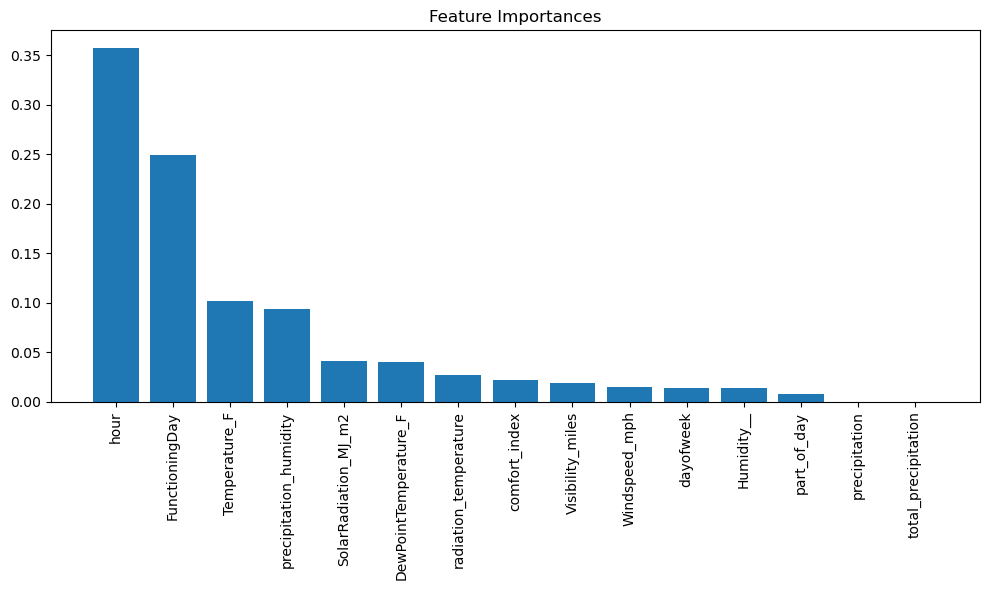

In [27]:
## Model Results ##

# Get the importance of x features with .feature_importances_ in the model
feature_importances = final_model.feature_importances_

# Get the feature names
features = x_train.columns

# Sort the feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Plotting the bar graph
plt.figure(figsize = (10, 6))
plt.title("Feature Importances")
plt.bar(range(x_train.shape[1]), feature_importances[sorted_indices], align = "center")
plt.xticks(range(x_train.shape[1]), features[sorted_indices], rotation = 90)
plt.tight_layout()
plt.show()

<br>
<h3>Hyperparameter Tuning</h3><br>

The tuning I decided to divide into two main parts. The first one is conducting a randomized search with folds, to end up printing the optimal parameters for the best version that this regression can have. The hyperparameter space was declared considering the help() function for this regression. From there I took also the options for each of them, preparing as best to my abilities the hyperparameter grid for the actual search using CV.

In [92]:
## Hyperparameter Tuning ##

# help(DecisionTreeRegressor) to see the hyperparameters that can be used

# Declaring a hyperparameter space
criterion_range = ["squared_error", "friedman_mse", "absolute_error", "poisson"]
splitter_range  = ["best", "random"]
depth_range     = np.arange(1, 11, 1) 
leaf_range      = np.arange(1, 21, 1)
maximum_feat    = ['sqrt', 'log2', None]


# Creating a hyperparameter grid
param_grid = { 'criterion'        : criterion_range,
               'splitter'         : splitter_range,
               'max_depth'        : depth_range, 
               'min_samples_leaf' : leaf_range, 
               'max_features'     : maximum_feat }

In [126]:
# INSTANTIATING the model object without hyperparameters
tuned_tree = final_model


# RandomizedSearchCV object 
tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree, 
                                   param_distributions   = param_grid,
                                   cv                    = 5,          
                                   n_iter                = 1000,       
                                   verbose               = 1,
                                   n_jobs                = -1,
                                   random_state          = 702)


# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(x_data, y_data)


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training R-Square:", tuned_tree_cv.best_score_.round(4))

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
Tuned Parameters  : {'splitter': 'random', 'min_samples_leaf': 7, 'max_features': None, 'max_depth': 10, 'criterion': 'friedman_mse'}
Tuned Training R-Square: 0.766


Once the optimal parameters were printed, and I was satisfied with the tuned r-squared, I decided to move on to the second part of the tuning, inputting said parameters into the actual model, to improve my predictions. I ended up changing by a number some of the inputs for me to be able to reduce the train-test gap to something close to 0.05.

In [127]:
## Tuned Model ##

# naming the model
final_model_name = 'Final Tuned Decision Tree Regression' 

# model type
final_model = DecisionTreeRegressor(criterion = 'squared_error',
                              splitter = 'random',
                              min_samples_leaf = 7,
                              max_depth = 10,
                              max_features = None,
                              random_state = 702)

# FITTING to the training data
final_model_fit = final_model.fit(x_train, y_train) 


# PREDICTING on new data
final_model_pred = final_model.predict(x_test)



# SCORING the results
final_model_train_score = final_model.score(x_train, y_train).round(4)
final_model_test_score  = final_model.score(x_test, y_test).round(4)
final_model_gap         = abs(final_model_train_score - final_model_test_score).round(4)
    

# dynamically printing results
final_model_summary =  f"""\
Model Name:     {final_model_name}
Train_Score:    {final_model_train_score}
Test_Score:     {final_model_test_score}
Train-Test Gap: {final_model_gap}
"""

print(final_model_summary)

Model Name:     Final Tuned Decision Tree Regression
Train_Score:    0.7956
Test_Score:     0.7507
Train-Test Gap: 0.0449



Finally, I got these results. Firstly, the problem with the over fitting of the model was greatly improved and solved. The train-test gap was reduced as much as possible without affecting the other two scores, which are looking pretty good.

Of course, this model is not the best, it is still a bit far from it. I decided to pick this as my final candidate and final submission for the Kaggle challenge and competition because, compared to the other models, even the runner-up candidates after the hyperparameter tuning, the decision tree regression is the one that gives the highest score. This might be because of the limited datasets that we're using, but this could change if the data was improved or changed. That being said, this model could also be improved with some more specific and technical feature engineering, and even more data and even better tuning, the model's performance could be improved in the future.

<br>
<h3>Residual Analysis and Tree Plotting</h3><br>

The residual analysis shows to certain extent the accuracy of the predictions of the model, offering the true actual values vs. the predicted ones of the model. This gives me a good visual on how my model is behaving as of now and the improvements that must be made. Furthermore, I created a plot for the final Decision Tree Regression Model, with the objective to at least get sense of what the final model looks like when making predictions behind the scenes.

In [128]:
## Residual Analysis ##

# organizing residuals
final_model_residuals = {"True"            : y_test,
                         "Predicted"       : final_model_pred }

# converting residuals into df
final_model_resid_df = pd.DataFrame(data = final_model_residuals)


# checking results
final_model_resid_df.head(n = 5)

,True,Predicted
ID,,
mb_1509,908.0,824.461538
mb_559,131.0,360.760000
mb_040,1208.0,959.396739
mb_1346,291.0,529.444444
mb_1463,1433.0,1155.600000


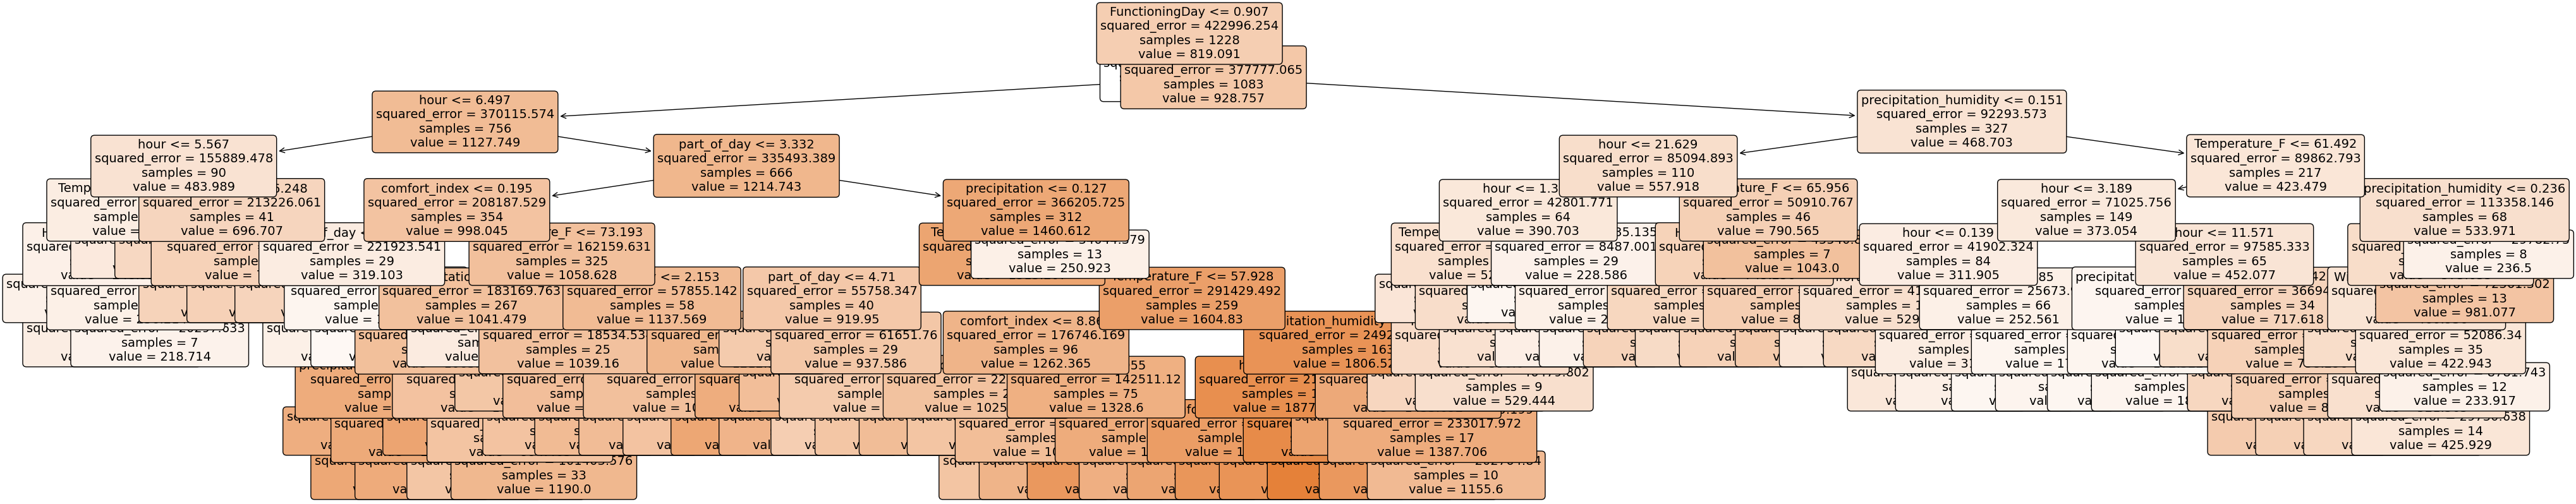

In [129]:
# Setting figure size
plt.figure(figsize = (50, 10)) # adjusting to better fit the visual

# Developing a plotted tree
plot_tree(final_model, # Ensure that 'model' is your fitted DecisionTreeRegressor
          feature_names = x_train.columns.tolist(),  # Convert column names to a list
          filled = True, 
          rounded = True, 
          fontsize = 14)

# rendering the plot
plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part V: Preparing Submission File for Kaggle</h2><br>
The code below will store the predicted values for each of the models above.

In [131]:
# x-data
x_data_kaggle = kaggle_data[x_features_final].copy()


# y-data
y_data_kaggle = kaggle_data[y_variable]


# Fitting model from above to the Kaggle test data
kaggle_predictions = final_model.predict(x_data_kaggle)

<br>
<h3>Creating the Kaggle File</h3><br>

In [132]:
## Kaggle Submission File ##

# organizing predictions
final_model_predictions = {"RENTALS" : kaggle_predictions}


# converting predictions into df
final_model_pred_df = pd.DataFrame(data  = final_model_predictions,
                             index = df_test.index)

<br>

In [133]:
#!######################!#
#!# name the .csv file #!#
#!######################!#

# name your model
final_model_pred_df.to_csv(path_or_buf = "./model_output/MDelRio_FinalModel.csv",
                     index       = True,
                     index_label = 'ID')

# A P P E N D I X

All models that are not the final Kaggle model will follow, as well as their analysis and observations.
(All models at the first models are unscaled for practical purposes of this notebook. After the presented models are done, the models with standarization come in after scaling the variables).

I chose to start with all of my x features for my first model. The reason for this, although probably unpractical, is that I plan to build a visualization for each model to figure out which is best suited for that one specifically.

NOTE: The standardize versions of some models will be done at the end. This is because the whole data changes to its scaled version.

In [66]:
#!###########################!#
#!# choose your x-variables #!#
#!###########################!#
x_features = ['DateHour', 'Temperature_F', 'Humidity__', 'Windspeed_mph', 
              'Visibility_miles', 'DewPointTemperature_F', 'Rainfall_in', 
              'Snowfall_in', 'SolarRadiation_MJ_m2', 'Holiday', 'FunctioningDay', 
              'hour', 'dayofweek', 'month', 'is_weekend', 'part_of_day', 
              'comfort_index', 'total_precipitation', 'precipitation', 
              'precipitation_humidity', 'radiation_temperature']

## CANDIDATE RUNNER-UP 1: LINEAR REGRESSION

Although it may seem obvious, this basic form of regression may be underestimated. It is fast to train and makes pretty good predictions without even tuning hyperparameters. When exploring the relationship between columns, in the case of this dataset has few strong correlations so they seem linear. 

In [43]:
#!###########################!#
#!# choose your x-variables #!#
#!###########################!#
x_features = ['DateHour', 'Temperature_F', 'Humidity__', 'Windspeed_mph', 
              'Visibility_miles', 'DewPointTemperature_F', 'Rainfall_in', 
              'Snowfall_in', 'SolarRadiation_MJ_m2', 'Holiday', 'FunctioningDay', 
              'hour', 'is_weekend', 'part_of_day', 
              'comfort_index', 'total_precipitation', 'precipitation', 
              'precipitation_humidity', 'radiation_temperature']

# prepping data for train-test split
y_data = df[y_variable]


# removing non-numeric columns and missing values
x_data = df[x_features].copy().select_dtypes(include=[int, float]).dropna(axis = 1)


# storing remaining x_features after the step above
x_features = list(x_data.columns)


# train-test split (to validate the model)
x_train, x_test, y_train, y_test = train_test_split(x_data, 
                                                    y_data, 
                                                    test_size    = 0.25,
                                                    random_state = 702 )

# naming the model
model_name_lr = 'Linear Regression'

# model type
model_lr = LinearRegression()

# FITTING to the training data
model_lr_fit = model_lr.fit(x_train, y_train) 


# PREDICTING on new data
model_lr_pred = model_lr.predict(x_test)



# SCORING the results
model_lr_train_score = model_lr.score(x_train, y_train).round(4)
model_lr_test_score  = model_lr.score(x_test, y_test).round(4)
model_lr_gap         = abs(model_lr_train_score - model_lr_test_score).round(4)
    

# dynamically printing results
model_lr_summary =  f"""\
Model Name:     {model_name_lr}
Train_Score:    {model_lr_train_score}
Test_Score:     {model_lr_test_score}
Train-Test Gap: {model_lr_gap}
"""

print(model_lr_summary)

Model Name:     Linear Regression
Train_Score:    0.6028
Test_Score:     0.5793
Train-Test Gap: 0.0235



In [44]:
## Hyperparameter Tuning ##

# help(LinearRegression) to see the hyperparameters that can be used

# Declaring a hyperparameter space
fit_intercepts = [True, False]
copy_Xs        = [True, False]
positives      = [True, False]


# Creating a hyperparameter grid
param_grid = { 'fit_intercept' : fit_intercepts,
               'copy_X'        : copy_Xs,
               'positive'      : positives }

# INSTANTIATING the model object without hyperparameters
tuned_linear = model_lr


# RandomizedSearchCV object 
tuned_linear_cv = RandomizedSearchCV(estimator           = tuned_linear, 
                                   param_distributions   = param_grid,
                                   cv                    = 5,          
                                   n_iter                = 8,       
                                   verbose               = 1,
                                   n_jobs                = -1,
                                   random_state          = 702)


# FITTING to the FULL DATASET (due to cross-validation)
tuned_linear_cv.fit(x_data, y_data)


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_linear_cv.best_params_)
print("Tuned Training R-Square:", tuned_linear_cv.best_score_.round(4))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Tuned Parameters  : {'positive': False, 'fit_intercept': True, 'copy_X': True}
Tuned Training R-Square: 0.587


After the tuning, in this case the model did not improve at all. The cause of this might be because of how small the search for optimal parameters was. Here, I couldn't use more folds because of the limited dataset, but also the metric I'm hoping to optimize might not be aligning well with the actual performance of the model. The results shown do have a small train-test gap and not the worst scoring though. 

In [45]:
# naming the model
model_lr_name = 'Linear Regression Tuned'

# model type
model_lr = LinearRegression(positive = False, 
                         fit_intercept = True, 
                         copy_X = True)

# FITTING to the training data
model_lr_fit = model_lr.fit(x_train, y_train) 


# PREDICTING on new data
model_lr_pred = model_lr.predict(x_test)



# SCORING the results
model_lr_train_score = model_lr.score(x_train, y_train).round(4)
model_lr_test_score  = model_lr.score(x_test, y_test).round(4)
model_lr_gap         = abs(model_lr_train_score - model_lr_test_score).round(4)
    

# dynamically printing results
model_lr_summary =  f"""\
Model Name:     {model_lr_name}
Train_Score:    {model_lr_train_score}
Test_Score:     {model_lr_test_score}
Train-Test Gap: {model_lr_gap}
"""

print(model_lr_summary)

Model Name:     Linear Regression Tuned
Train_Score:    0.6028
Test_Score:     0.5793
Train-Test Gap: 0.0235



### K-NEAREST NEIGHBORS

This model did pretty badly, especially if I consider the train-test gap. I tried dropping different x features, but it seem to cause no change at all. Because of this, i decided to discard using this one or even focusing on tuning it (which I did tried but it did not improve at all).

In [46]:
#!###########################!#
#!# choose your x-variables #!#
#!###########################!#
x_features = ['DateHour', 'Temperature_F', 'Humidity__', 'Windspeed_mph', 
              'Visibility_miles', 'DewPointTemperature_F', 'Rainfall_in', 
              'Snowfall_in', 'SolarRadiation_MJ_m2', 'Holiday', 'FunctioningDay', 
              'hour', 'is_weekend', 'part_of_day', 
              'comfort_index', 'total_precipitation', 'precipitation', 
              'precipitation_humidity', 'radiation_temperature']

# prepping data for train-test split
y_data = df[y_variable]


# removing non-numeric columns and missing values
x_data = df[x_features].copy().select_dtypes(include=[int, float]).dropna(axis = 1)


# storing remaining x_features after the step above
x_features = list(x_data.columns)


# train-test split (to validate the model)
x_train, x_test, y_train, y_test = train_test_split(x_data, 
                                                    y_data, 
                                                    test_size    = 0.25,
                                                    random_state = 702 )

# naming the model
knn_model_name = 'K-Nearest Neighbors'

# model type
knn_model = KNeighborsRegressor()

# FITTING to the training data
knn_model_fit = knn_model.fit(x_train, y_train) 


# PREDICTING on new data
knn_model_pred = knn_model.predict(x_test)



# SCORING the results
knn_model_train_score = knn_model.score(x_train, y_train).round(4)
knn_model_test_score  = knn_model.score(x_test, y_test).round(4)
knn_model_gap         = abs(knn_model_train_score - knn_model_test_score).round(4)
    

# dynamically printing results
knn_model_summary =  f"""\
Model Name:     {knn_model_name}
Train_Score:    {knn_model_train_score}
Test_Score:     {knn_model_test_score}
Train-Test Gap: {knn_model_gap}
"""

print(knn_model_summary)

Model Name:     K-Nearest Neighbors
Train_Score:    0.5968
Test_Score:     0.3022
Train-Test Gap: 0.2946



I'll proceed to make a copy of the original df with the objective of not disturbing that data used in the final candidate selected for Kaggle.

In [47]:
df_for_scaling = df

### LASSO AND ELASTIC NET REGRESSIONS (SCALED)

Both of these models had a not great performance, which was a bit unexpected by me. At first, I purposefully did not scale the data to see the impact of not standardizing it. Even a warning is issued in my notebook, stating that it would be for the best to scale the variables, which is why I decided to scale my variables for both of these models and also the Ridge Regression. Even so, the scores did not improve much. Because of this, I spent some time reviewing the standarization process and even delve into tuning, but I ended up giving up because there was no more significant improvements.

Maybe with more time and a larger dataset, and more practice in modeling, I could come back to these models, because on one hand, Lasso prevents over fitting and works well with a large number of features, while on the other hand, Elastic Net helps predict better long-term.

In [67]:
# Standarization

# Exclude non-numeric columns before scaling
numeric_cols = df_for_scaling.select_dtypes(include=[np.number]).columns.tolist()

# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()

# Scale only numeric columns
x_scaled = scaler.fit_transform(df_for_scaling[numeric_cols])

# Create a DataFrame from the scaled numeric data
x_scaled_df = pd.DataFrame(x_scaled, index=df_for_scaling.index, columns=numeric_cols)


# Updating df_full to be the new DataFrame with scaled features (and 'DateHour' if reattached)
df_scaled = x_scaled_df.copy()

In [69]:
 #!###########################!#
#!# choose your x-variables #!#
#!###########################!#
x_features1 = ['Temperature_F', 'Humidity__', 'Windspeed_mph', 
              'Visibility_miles', 'DewPointTemperature_F', 'Rainfall_in', 
              'Snowfall_in', 'SolarRadiation_MJ_m2',  
              'hour', 'dayofweek', 'month', 'is_weekend', 'part_of_day', 
              'comfort_index', 'total_precipitation', 'precipitation', 
              'precipitation_humidity', 'radiation_temperature']

# prepping data for train-test split
y_data = df_scaled[y_variable]


# removing non-numeric columns and missing values
x_data1 = df_scaled[x_features1].copy().select_dtypes(include=[int, float]).dropna(axis = 1)


# storing remaining x_features after the step above
x_features = list(x_data1.columns)


# train-test split (to validate the model)
x_train, x_test, y_train, y_test = train_test_split(x_data, 
                                                    y_data, 
                                                    test_size    = 0.25,
                                                    random_state = 702 )

# naming the model
asso_model_name = 'Lasso Regression'

# model type
asso_model = Lasso()

# FITTING to the training data
asso_model_fit = asso_model.fit(x_train, y_train) 


# PREDICTING on new data
asso_model_pred = asso_model.predict(x_test)



# SCORING the results
asso_model_train_score = asso_model.score(x_train, y_train).round(4)
asso_model_test_score  = asso_model.score(x_test, y_test).round(4)
asso_model_gap         = abs(asso_model_train_score - asso_model_test_score).round(4)
    

# dynamically printing results
asso_model_summary =  f"""\
Model Name:     {asso_model_name}
Train_Score:    {asso_model_train_score}
Test_Score:     {asso_model_test_score}
Train-Test Gap: {asso_model_gap}
"""

print(asso_model_summary)

Model Name:     Lasso Regression
Train_Score:    0.286
Test_Score:     0.2855
Train-Test Gap: 0.0005



In [74]:
#!###########################!#
#!# choose your x-variables #!#
#!###########################!#
x_features3 = ['Temperature_F', 'Humidity__', 'Windspeed_mph', 
              'Visibility_miles', 'DewPointTemperature_F', 'Rainfall_in', 
              'Snowfall_in', 'SolarRadiation_MJ_m2',  
              'hour', 'dayofweek', 'month', 'is_weekend', 'part_of_day', 
              'comfort_index', 'total_precipitation', 'precipitation', 
              'precipitation_humidity', 'radiation_temperature']

# prepping data for train-test split
y_data = df_scaled[y_variable]


# removing non-numeric columns and missing values
x_data3 = df_scaled[x_features3].copy().select_dtypes(include=[int, float]).dropna(axis = 1)


# storing remaining x_features after the step above
x_features = list(x_data3.columns)


# train-test split (to validate the model)
x_train, x_test, y_train, y_test = train_test_split(x_data, 
                                                    y_data, 
                                                    test_size    = 0.25,
                                                    random_state = 702 )

# naming the model
elastic_model_name = 'Elastic Net Regression (with some tunings)'

# model type
elastic_model = SGDRegressor(alpha         = 0.00042005783775832093,
                             penalty       = 'l2', 
                             loss          = 'epsilon_insensitive', 
                             learning_rate = 'adaptive',
                             fit_intercept = False)

# FITTING to the training data
elastic_model_fit = elastic_model.fit(x_train, y_train) 


# PREDICTING on new data
elastic_model_pred = elastic_model.predict(x_test)



# SCORING the results
elastic_model_train_score = elastic_model.score(x_train, y_train).round(4)
elastic_model_test_score  = elastic_model.score(x_test, y_test).round(4)
elastic_model_gap         = abs(elastic_model_train_score - elastic_model_test_score).round(4)
    

# dynamically printing results
elastic_model_summary =  f"""\
Model Name:     {elastic_model_name}
Train_Score:    {elastic_model_train_score}
Test_Score:     {elastic_model_test_score}
Train-Test Gap: {elastic_model_gap}
"""

print(elastic_model_summary)

Model Name:     Elastic Net Regression (with some tunings)
Train_Score:    0.4687
Test_Score:     0.4467
Train-Test Gap: 0.022



## CANDIDATE RUNNER-UP 2: RIDGE REGRESSION (SCALED)

Taking into account that the Ridge Regression could over fitting, it makes sense that the score changes with the imposing of penalties in the hyperparameter tuning. When doing this, the new scoring did get a bit better but not significantly enough. I tried different approaches for improving the tuning, but settle with this one and I decided for this candidate model to be my second runner-up because even if it has a low score, it has the potential of preventing over fitted data and the train-test gap is also very favorable. Even so, it's important to note Ridge Regression doesn't perform feature selection, unlike others where standarization benefits them. This being said, some features may have small and not so significant coefficients. 

In [70]:
#!###########################!#
#!# choose your x-variables #!#
#!###########################!#
x_features2 = ['Temperature_F', 'Humidity__', 'Windspeed_mph', 
              'Visibility_miles', 'DewPointTemperature_F', 'SolarRadiation_MJ_m2',  
              'hour', 'dayofweek', 'part_of_day', 
              'comfort_index', 'total_precipitation', 'precipitation', 
              'precipitation_humidity', 'radiation_temperature']

# prepping data for train-test split
y_data = df_scaled[y_variable]


# removing non-numeric columns and missing values
x_data2 = df_scaled[x_features2].copy().select_dtypes(include=[int, float]).dropna(axis = 1)


# storing remaining x_features after the step above
x_features = list(x_data2.columns)


# train-test split (to validate the model)
x_train, x_test, y_train, y_test = train_test_split(x_data, 
                                                    y_data, 
                                                    test_size    = 0.25,
                                                    random_state = 702 )

# naming the model
ridge_model_name = 'Ridge Regression'

# model type
ridge_model = Ridge()

# FITTING to the training data
ridge_model_fit = ridge_model.fit(x_train, y_train) 


# PREDICTING on new data
ridge_model_pred = ridge_model.predict(x_test)



# SCORING the results
ridge_model_train_score = ridge_model.score(x_train, y_train).round(4)
ridge_model_test_score  = ridge_model.score(x_test, y_test).round(4)
ridge_model_gap         = abs(ridge_model_train_score - ridge_model_test_score).round(4)
    

# dynamically printing results
ridge_model_summary =  f"""\
Model Name:     {ridge_model_name}
Train_Score:    {ridge_model_train_score}
Test_Score:     {ridge_model_test_score}
Train-Test Gap: {ridge_model_gap}
"""

print(ridge_model_summary)

Model Name:     Ridge Regression
Train_Score:    0.5985
Test_Score:     0.5652
Train-Test Gap: 0.0333



In [80]:
## Hyperparameter Tuning ##

# help(Ridge()) to see the hyperparameters that can be used
from scipy.stats import uniform

# Declaring a hyperparameter space
fit_intercepts = [True, False]
copy_Xs        = [True, False]
solvers        = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']

# Creating a hyperparameter grid
param_grid = { 'fit_intercept' : fit_intercepts,
               'copy_X'        : copy_Xs,
               'solver'        : solvers, 
               'alpha'         : uniform(0.1, 10)}

# INSTANTIATING the model object without hyperparameters
tuned_ridge = ridge_model


# RandomizedSearchCV object 
tuned_ridge_cv = RandomizedSearchCV(estimator           = tuned_ridge, 
                                   param_distributions   = param_grid,
                                   cv                    = 5,          
                                   n_iter                = 100,       
                                   verbose               = 1,
                                   n_jobs                = -1,
                                   random_state          = 702)


# FITTING to the FULL DATASET (due to cross-validation)
tuned_ridge_cv.fit(x_data, y_data)


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_ridge_cv.best_params_)
print("Tuned Training R-Square:", tuned_ridge_cv.best_score_.round(4))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Tuned Parameters  : {'alpha': 1.0929236321608293, 'copy_X': True, 'fit_intercept': True, 'solver': 'auto'}
Tuned Training R-Square: 0.5797


In [87]:
# naming the model
ridge_model_name = 'Tuned Ridge Regression'

# model type
ridge_model = Ridge(alpha = 0.5,
                    copy_X = True,
                    fit_intercept = True, 
                    solver = 'auto')

# FITTING to the training data
ridge_model_fit = ridge_model.fit(x_train, y_train) 


# PREDICTING on new data
ridge_model_pred = ridge_model.predict(x_test)



# SCORING the results
ridge_model_train_score = ridge_model.score(x_train, y_train).round(4)
ridge_model_test_score  = ridge_model.score(x_test, y_test).round(4)
ridge_model_gap         = abs(ridge_model_train_score - ridge_model_test_score).round(4)
    

# dynamically printing results
ridge_model_summary =  f"""\
Model Name:     {ridge_model_name}
Train_Score:    {ridge_model_train_score}
Test_Score:     {ridge_model_test_score}
Train-Test Gap: {ridge_model_gap}
"""

print(ridge_model_summary)

Model Name:     Tuned Ridge Regression
Train_Score:    0.5991
Test_Score:     0.5661
Train-Test Gap: 0.033



<br>

<br>